In [78]:
import tensorflow as tf

In [79]:
import numpy as np


from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [80]:
tf.random.set_seed(1)
np.random.seed(1)

In [81]:
X = np.random.uniform( low=-1, high=1, size=(200, 2) )

In [82]:
X

array([[-1.65955991e-01,  4.40648987e-01],
       [-9.99771250e-01, -3.95334855e-01],
       [-7.06488218e-01, -8.15322810e-01],
       [-6.27479577e-01, -3.08878546e-01],
       [-2.06465052e-01,  7.76334680e-02],
       [-1.61610971e-01,  3.70439001e-01],
       [-5.91095501e-01,  7.56234873e-01],
       [-9.45224814e-01,  3.40935020e-01],
       [-1.65390395e-01,  1.17379657e-01],
       [-7.19226123e-01, -6.03797022e-01],
       [ 6.01489137e-01,  9.36523151e-01],
       [-3.73151644e-01,  3.84645231e-01],
       [ 7.52778305e-01,  7.89213327e-01],
       [-8.29911577e-01, -9.21890434e-01],
       [-6.60339161e-01,  7.56285007e-01],
       [-8.03306332e-01, -1.57784750e-01],
       [ 9.15779060e-01,  6.63305699e-02],
       [ 3.83754228e-01, -3.68968738e-01],
       [ 3.73001855e-01,  6.69251344e-01],
       [-9.63423445e-01,  5.00288630e-01],
       [ 9.77722178e-01,  4.96331309e-01],
       [-4.39112016e-01,  5.78558657e-01],
       [-7.93547987e-01, -1.04212948e-01],
       [ 8.

In [83]:
y = np.ones( len(X) )

In [84]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [85]:
y[ X[:, 0] * X[:, 1] < 0 ] = 0
y

array([0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.])

In [86]:
print(X.shape)
print(y.shape)

(200, 2)
(200,)


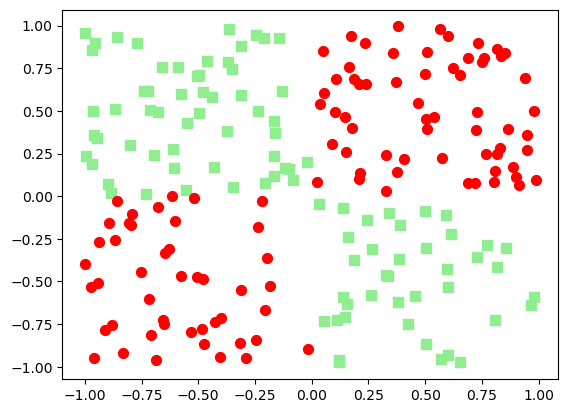

In [87]:
plt.scatter(X[ y==0 ,0], X[ y==0 , 1], s=50, c='lightgreen',marker='s', label='class0')
plt.scatter(X[ y==1 ,0], X[y==1 , 1], s=50, c='red', marker='o', label='class1')
plt.show()

In [115]:
X_train = X[:100, :]
Y_train = y[:100]

X_test = X[100:, :]
Y_test = y[100:]

In [116]:
model = tf.keras.Sequential()
model.add( tf.keras.layers.Dense(units=4, input_shape=(2,), activation='relu') )
model.add( tf.keras.layers.Dense(units=4, activation='relu'))
model.add( tf.keras.layers.Dense(units=4, activation='relu'))
model.add( tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [117]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 4)                 12        
                                                                 
 dense_29 (Dense)            (None, 4)                 20        
                                                                 
 dense_30 (Dense)            (None, 4)                 20        
                                                                 
 dense_31 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [118]:

model.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy() ]
)


In [119]:
history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_test, Y_test),
    epochs=200,
    batch_size=8,
    verbose=1
)

Epoch 1/200
13/13 [==============================] - 1s 35ms/step - loss: 0.6949 - binary_accuracy: 0.5400 - val_loss: 0.6968 - val_binary_accuracy: 0.4700
Epoch 2/200
13/13 [==============================] - 0s 11ms/step - loss: 0.6926 - binary_accuracy: 0.5500 - val_loss: 0.6943 - val_binary_accuracy: 0.4700
Epoch 3/200
13/13 [==============================] - 0s 11ms/step - loss: 0.6906 - binary_accuracy: 0.5000 - val_loss: 0.6920 - val_binary_accuracy: 0.5200
Epoch 4/200
13/13 [==============================] - 0s 10ms/step - loss: 0.6884 - binary_accuracy: 0.5700 - val_loss: 0.6895 - val_binary_accuracy: 0.5200
Epoch 5/200
13/13 [==============================] - 0s 11ms/step - loss: 0.6863 - binary_accuracy: 0.5500 - val_loss: 0.6870 - val_binary_accuracy: 0.5100
Epoch 6/200
13/13 [==============================] - 0s 11ms/step - loss: 0.6843 - binary_accuracy: 0.5900 - val_loss: 0.6851 - val_binary_accuracy: 0.5500
Epoch 7/200
13/13 [==============================] - 0s 11ms/ste

13/13 [==============================] - 0s 11ms/step - loss: 0.6043 - binary_accuracy: 0.8900 - val_loss: 0.6103 - val_binary_accuracy: 0.8300
Epoch 54/200
13/13 [==============================] - 0s 11ms/step - loss: 0.6016 - binary_accuracy: 0.8700 - val_loss: 0.6079 - val_binary_accuracy: 0.8300
Epoch 55/200
13/13 [==============================] - 0s 11ms/step - loss: 0.5990 - binary_accuracy: 0.8700 - val_loss: 0.6057 - val_binary_accuracy: 0.8400
Epoch 56/200
13/13 [==============================] - 0s 10ms/step - loss: 0.5964 - binary_accuracy: 0.8900 - val_loss: 0.6032 - val_binary_accuracy: 0.8400
Epoch 57/200
13/13 [==============================] - 0s 10ms/step - loss: 0.5936 - binary_accuracy: 0.8800 - val_loss: 0.6007 - val_binary_accuracy: 0.8400
Epoch 58/200
13/13 [==============================] - 0s 10ms/step - loss: 0.5915 - binary_accuracy: 0.8900 - val_loss: 0.5982 - val_binary_accuracy: 0.8400
Epoch 59/200
13/13 [==============================] - 0s 10ms/step - lo

13/13 [==============================] - 0s 11ms/step - loss: 0.4071 - binary_accuracy: 0.9100 - val_loss: 0.4336 - val_binary_accuracy: 0.8900
Epoch 106/200
13/13 [==============================] - 0s 12ms/step - loss: 0.4028 - binary_accuracy: 0.9100 - val_loss: 0.4296 - val_binary_accuracy: 0.8900
Epoch 107/200
13/13 [==============================] - 0s 12ms/step - loss: 0.3990 - binary_accuracy: 0.9200 - val_loss: 0.4261 - val_binary_accuracy: 0.8900
Epoch 108/200
13/13 [==============================] - 0s 12ms/step - loss: 0.3946 - binary_accuracy: 0.9200 - val_loss: 0.4223 - val_binary_accuracy: 0.8900
Epoch 109/200
13/13 [==============================] - 0s 12ms/step - loss: 0.3906 - binary_accuracy: 0.9200 - val_loss: 0.4188 - val_binary_accuracy: 0.8700
Epoch 110/200
13/13 [==============================] - 0s 12ms/step - loss: 0.3867 - binary_accuracy: 0.9300 - val_loss: 0.4153 - val_binary_accuracy: 0.8900
Epoch 111/200
13/13 [==============================] - 0s 12ms/ste

Epoch 157/200
13/13 [==============================] - 0s 11ms/step - loss: 0.2578 - binary_accuracy: 0.9700 - val_loss: 0.2918 - val_binary_accuracy: 0.9400
Epoch 158/200
13/13 [==============================] - 0s 12ms/step - loss: 0.2554 - binary_accuracy: 0.9600 - val_loss: 0.2882 - val_binary_accuracy: 0.9400
Epoch 159/200
13/13 [==============================] - 0s 10ms/step - loss: 0.2530 - binary_accuracy: 0.9600 - val_loss: 0.2857 - val_binary_accuracy: 0.9400
Epoch 160/200
13/13 [==============================] - 0s 9ms/step - loss: 0.2519 - binary_accuracy: 0.9700 - val_loss: 0.2862 - val_binary_accuracy: 0.9400
Epoch 161/200
13/13 [==============================] - 0s 9ms/step - loss: 0.2491 - binary_accuracy: 0.9500 - val_loss: 0.2826 - val_binary_accuracy: 0.9400
Epoch 162/200
13/13 [==============================] - 0s 10ms/step - loss: 0.2485 - binary_accuracy: 0.9700 - val_loss: 0.2808 - val_binary_accuracy: 0.9400
Epoch 163/200
13/13 [==============================] -

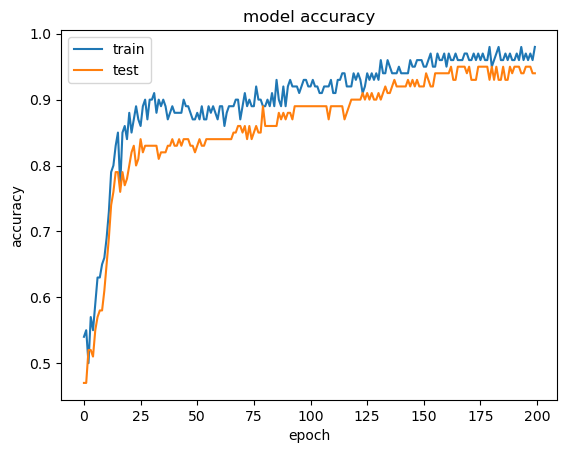

In [120]:
plt.plot( history.history['binary_accuracy'] )                 ##train
plt.plot( history.history['val_binary_accuracy'] )             ##test
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.show()

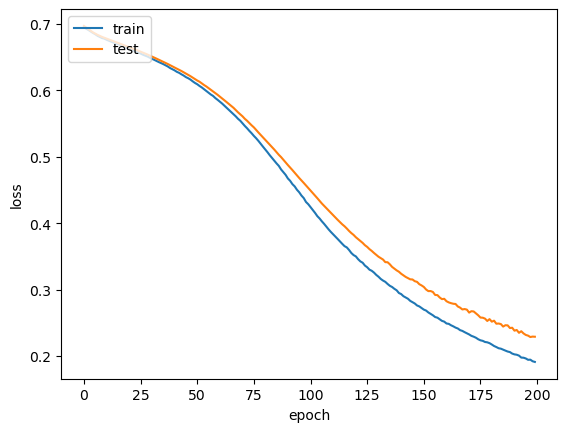

In [121]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [122]:
y_pred = model.predict(X_test)
y_pred
y_pred_labels = (y_pred > 0.5).astype(int)
precision = precision_score(Y_test, y_pred_labels, average="weighted", zero_division=1)
recall = recall_score(Y_test, y_pred_labels)
f1 = 2* recall * precision / (recall + precision)

print("Precision : ", precision)
print("Recall: ", recall)
print("F1: ", f1)

4/4 [==============================] - 0s 4ms/step
Precision :  0.942578539371685
Recall:  0.9811320754716981
F1:  0.9614689771872098


In [123]:
model.save('XORmodel_1.h5')